In [1]:
# Load modules we'll need.
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

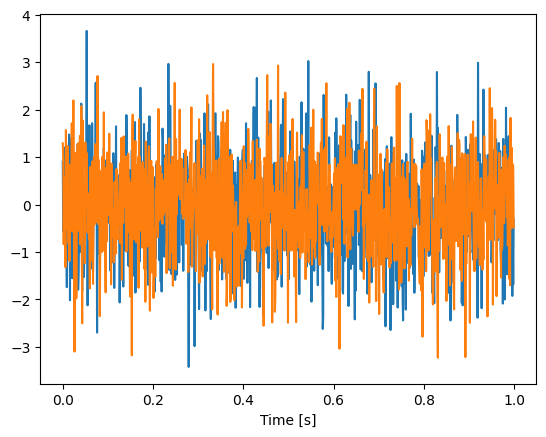

In [2]:
# Make two noisy signals.
N = 1000;
dt= 0.001;
T = N*dt;
x = np.random.randn(N)
y = np.random.randn(N)
t = np.arange(0,N)*dt

plt.plot(t,x)
plt.plot(t,y)
plt.xlabel('Time [s]');

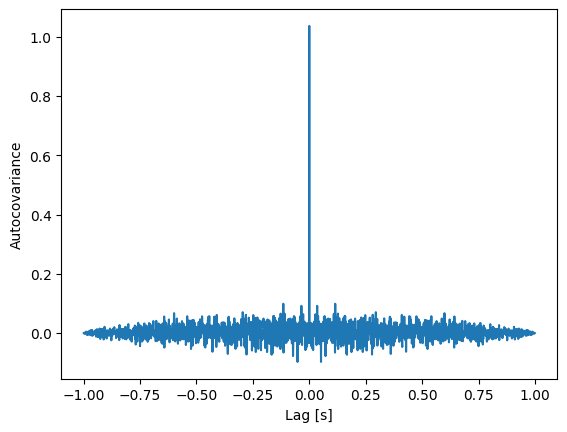

In [3]:
# Compute the auto-covariance.
ac_xx = 1 / N * np.correlate(x,x, 'full')    # Compute the covariance.
lags = np.arange(-N + 1, N)                  # Create a lag axis,
plt.plot(lags * dt, ac_xx)                   # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');


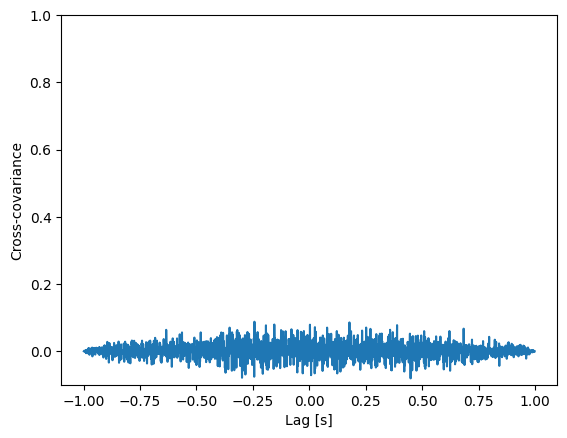

In [4]:
# Compute the cross-covariance.
cc_xy = 1 / N * np.correlate(x,y, 'full')    # Compute the covariance.
lags = np.arange(-N + 1, N)                  # Create a lag axis,
plt.plot(lags * dt, cc_xy)                   # ... and plot the result.
plt.ylim([-0.1, 1])
plt.xlabel('Lag [s]')
plt.ylabel('Cross-covariance');


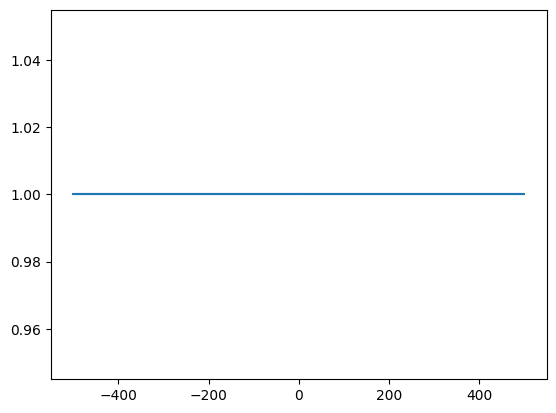

In [8]:
Xf = np.fft.fft(x - x.mean())           # Compute Fourier transform of x
Yf = np.fft.fft(y - y.mean())           # Compute Fourier transform of y

# Compute the spectra
Sxx = 2*dt**2/T * Xf * np.conj (Xf)  # Spectrum of E1 trials
Syy = 2*dt**2/T * Yf * np.conj (Yf)  # ... and E2 trials
Sxy = 2*dt**2/T * Xf * np.conj (Yf)  # ... and the cross spectrum

# Compute the coherence.
cohr = np.abs(Sxy) / (np.abs(np.sqrt(Sxx)) * np.abs(np.sqrt(Syy)))

# Define a frequency axis.
f = np.fft.fftfreq(N, dt)

# Plot the result.
plt.plot(f, cohr.real)